<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details</a></span></li><li><span><a href="#Example:-Conjugate-prior-Bernoulli-Beta/Binomial-Beta" data-toc-modified-id="Example:-Conjugate-prior-Bernoulli-Beta/Binomial-Beta-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example: Conjugate-prior Bernoulli-Beta/Binomial-Beta</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simulation</a></span></li></ul></div>

# Beta Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction

The beta distribution is a distribution that often is used to describe probabilities since it has support of $[0, 1]$.


### Details

The beta distribution is governed by two parameters $\alpha$ and $\beta$. These don't necessarily have a great interpretation, but, if the beta distribution describes the $p$ from a Bernoulli random variable, then the $\alpha$ can be interpreted as the number of successes and $\beta$ as the number of failures.

The probability mass function is given by

$$f(\theta; \alpha, \beta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}$$

where $B(\alpha, \beta)$ is the Beta function and is used to normalize the function so it is a distribution -- The Beta distribution is defined by $\text{B}(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} dt$.

The mean is $\frac{\alpha}{\alpha + \beta}$

The variance is $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

In [2]:
def beta_plot_pdf_cdf(a, b):
    brv = st.beta(a, b)
    fig, ax = plt.subplots(1, 2, figsize=(9, 6))
    
    xvals = np.linspace(0, 1, 5000)
    ax[0].plot(xvals, brv.pdf(xvals))
    ax[0].set_title("Probability Density Function")

    ax[1].plot(xvals, brv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
_as = FloatSlider(
    value=1, min=0.25, max=10,
    step=0.25, description="Alpha",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)
_bs = FloatSlider(
    value=1, min=0.25, max=10.0,
    step=0.25, description="Beta",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

output = interact(beta_plot_pdf_cdf, a=_as, b=_bs)

interactive(children=(FloatSlider(value=1.0, description='Alpha', layout=Layout(width='40%'), max=10.0, min=0.…

### Example: Conjugate-prior Bernoulli-Beta/Binomial-Beta

Suppose that the probability with which a student passes a class, $p$, is unknown, but, prior to observing any additional information, we believe it is distributed according to $\text{beta}(1, 1)$.

In [4]:
alpha = 1
beta = 1

brv = st.beta(alpha, beta)

In [5]:
brv.rvs()

0.9416751883371288

In [6]:
brv.mean()

0.5

In [7]:
brv.var()

0.08333333333333333

We observe the student take their first class over the summer and they pass. What should we believe about the probability with which they'll pass classes going forward?

\begin{align*}
  \text{Probability}(p | \text{success}) &= \frac{\text{Probability}(\text{success} | p) \text{Probability}(p)}{\text{Probability}(\text{success})} \\
  &= \frac{p \frac{p^{1-1} (1 - p)^{1 - 1}}{\text{B}(1, 1)}}{\int_0^1 p} \\
  &= \frac{p^{2 - 1} (1 - p)^{1 - 1}}{\text{B}(2, 1)} \\
  &\rightarrow p \sim \text{Beta}(\alpha + 1, \beta)
\end{align*}

We could write this in a more generalized way, but, suffice it to say, that $\alpha$ will correspond to the number of successful classes (plus 1) and $\beta$ will correspond to the number of failed classes (plus 1)

### Simulation

Suppose the actual probability with which a student passes a class is 0.8. How many classes does the student need to take before our 25th percentile estimate of their class passing probability is above 0.7?

In [8]:
p = 0.8
bern_rv = st.bernoulli(p)
nsims = 1_000
n_until_pp0p7 = np.zeros(nsims)

for sim in range(nsims):
    a, b = 1, 1
    nclasses = 0
    pp_lt_0p7 = True

    while pp_lt_0p7:
        passed_class = bern_rv.rvs()
        nclasses = nclasses + 1
        
        a = a + passed_class
        b = b + (1 - passed_class)

        beta_rv = st.beta(a, b)
        pp_lt_0p7 = (beta_rv.ppf(0.25) < 0.7)

    n_until_pp0p7[sim] = nclasses

In [9]:
print(np.min(n_until_pp0p7))
print(np.max(n_until_pp0p7))
print(st.beta(3 + 1, 1).ppf(0.25))  # Number of classes plus 1

3.0
151.0
0.7071067811865476


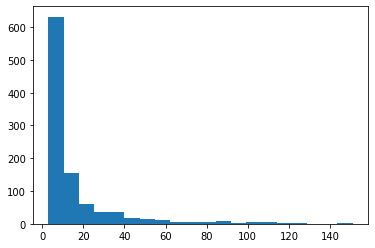

In [10]:
plt.hist(n_until_pp0p7, bins=20);

**Note**: In creating this notebook, I referenced the "Distribution Explorer" material found at https://distribution-explorer.github.io/index.html. I certainly encourage others to find additional information there.